# Example 5: Recovery of the Alameda Island using R2D damage estimates and third-party infrastructure simulators.

Example 5 shows how **pyrecodes** extends NHERI R2D's damage assessment to simulate recovery and integrate third-party infrastructure simulators of water supply systems and transportation systems to assess their interdependencies. Sparse distribution time stepping is used. 

Please refer to the **pyrecodes** [Example 5 page](https://nikolablagojevic.github.io/pyrecodes/html/usage/examples/example_5.html) for further details.

In [7]:
from pyrecodes import main

system = main.run('./Example 5/SmallAlameda_Main.json')

system.calculate_resilience()

Repair time is 0 for component 1619. Setting it to default value of 30 days.
Repair time is 0 for component 2053. Setting it to default value of 30 days.
Time step:  0
Time step:  1
Time step:  2
Time step:  3
Time step:  4
Time step:  5
Time step:  6
Time step:  7
Time step:  8
Time step:  9
Time step:  10
Time step:  11
Time step:  12
Time step:  13
Time step:  14
Time step:  15
Time step:  16
Time step:  17
Time step:  18
Time step:  19
Time step:  20
Time step:  21
Time step:  22
Time step:  23
Time step:  24
Time step:  25
Time step:  26
Time step:  27
Time step:  28
Time step:  29
Time step:  30
Time step:  31
Time step:  32
Time step:  33
Time step:  34
Time step:  35
Time step:  36
Time step:  37
Time step:  38
Time step:  39
Time step:  40
Time step:  41
Time step:  42
Time step:  43
Time step:  44
Time step:  45
Time step:  46
Time step:  47
Time step:  48
Time step:  49
Time step:  50
Time step:  51
Time step:  52
Time step:  53
Time step:  54
Time step:  55
Time step:  56
T

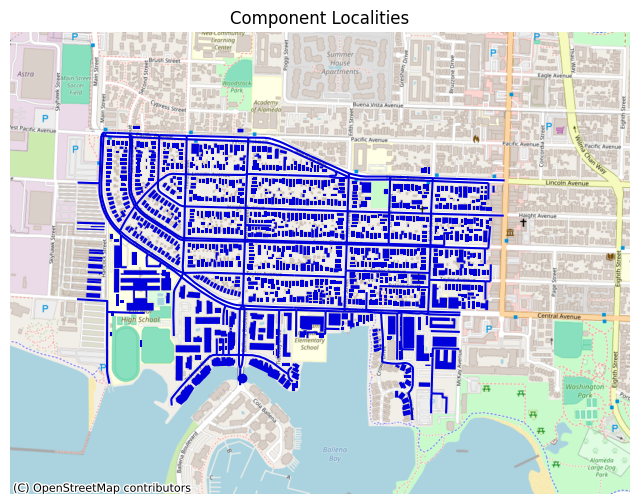

In [2]:
from pyrecodes.geovisualizer.r2d_geovisualizer import R2D_GeoVisualizer
geo_visualizer = R2D_GeoVisualizer(system.components)
geo_visualizer.plot_component_localities()

time_steps_to_plot = list(range(1, 50, 2)) + list(range(50, system.time_step, 20)) + [system.time_step]

create_time_step_building_figures = True
create_recovery_gif = True

for time_step in time_steps_to_plot: 
    if create_time_step_building_figures:
        geo_visualizer.create_current_state_buildings_and_supply_demand_figure(time_step, system, resources_to_plot=['Shelter', 'PotableWater'], units=['[beds/day]', '[m^3/day]'], show=False, save=True, dpi=50)
    
if create_recovery_gif:
    # To create a gif, you need to have the time_step figures already created.
    # They are created using the geo_visualisator.create_current_state_buildings_and_supply_demand_figure method with the save=True and show=False option.
    geo_visualizer.create_recovery_gif(time_steps_to_plot, fps=3)

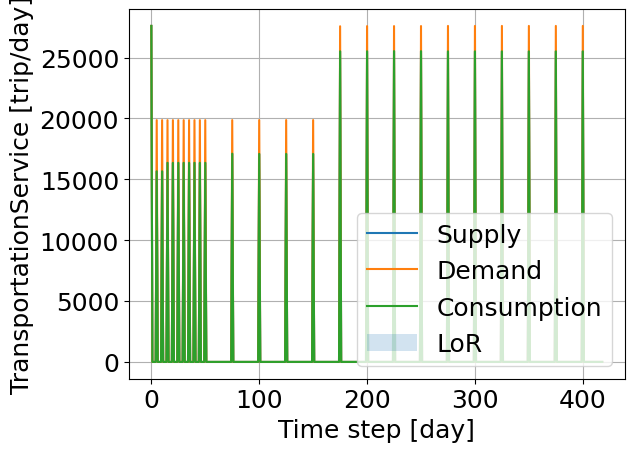

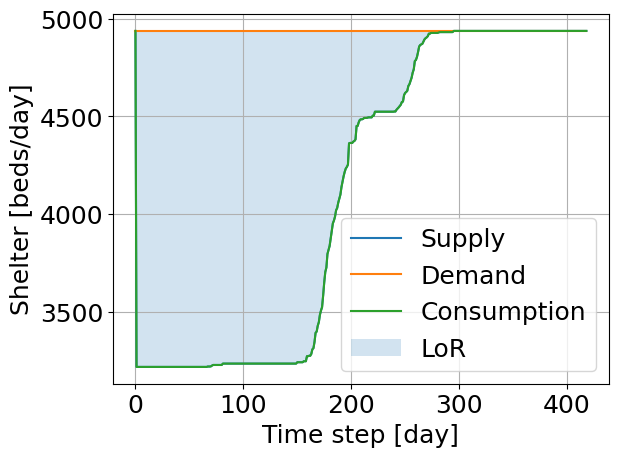

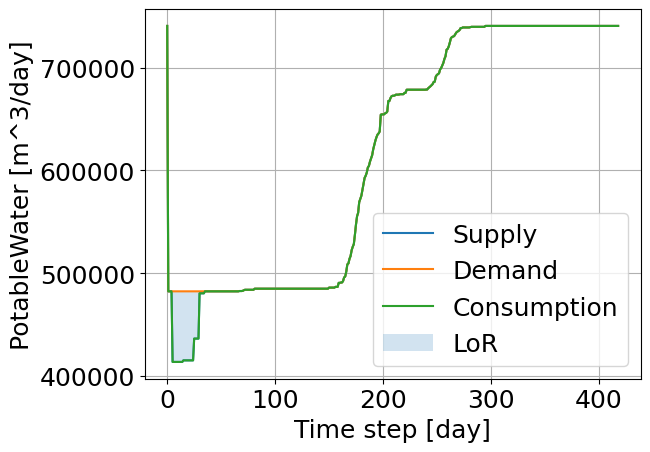

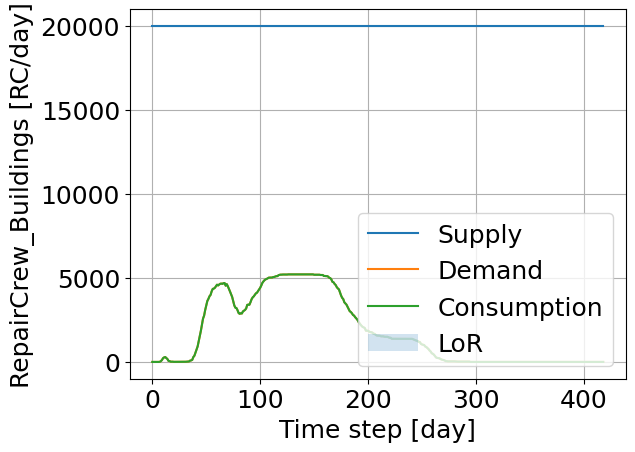

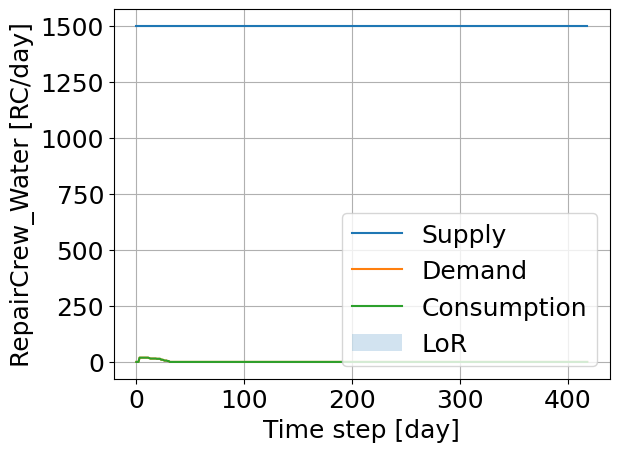

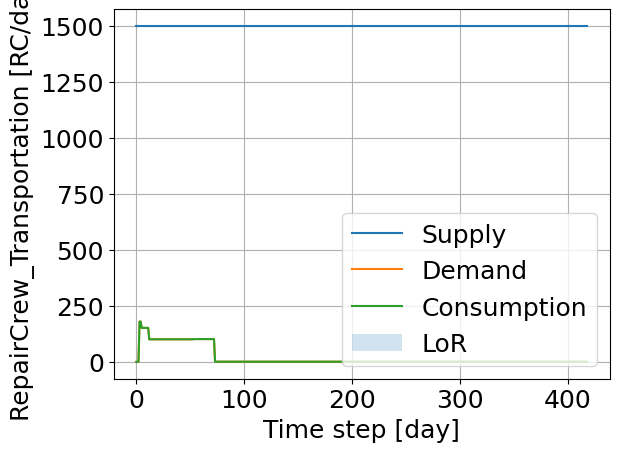

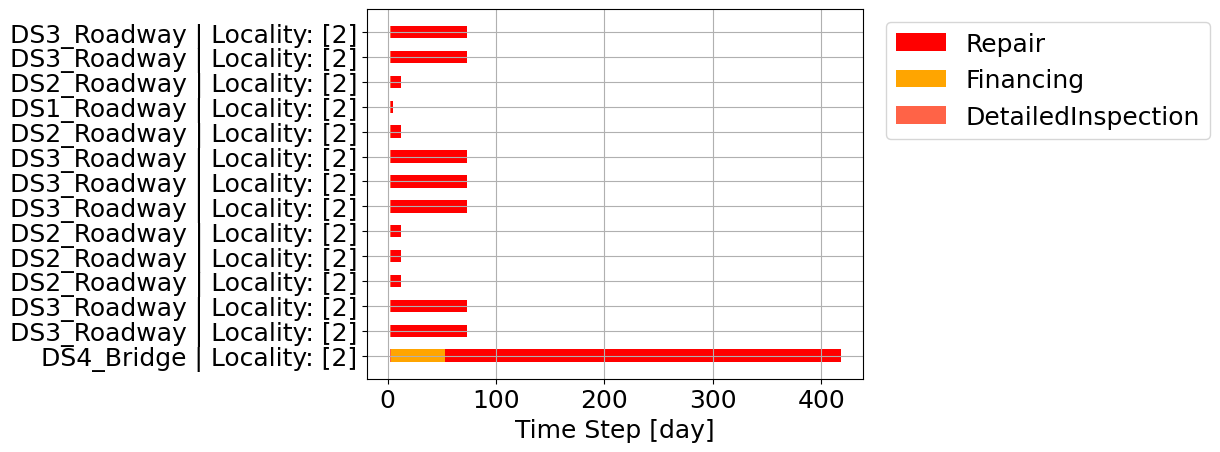

In [3]:
from pyrecodes.plotter.concrete_plotter import ConcretePlotter

plotter_object = ConcretePlotter()
resources_to_plot = ['TransportationService', 'Shelter', 'PotableWater',  'RepairCrew_Buildings', 'RepairCrew_Water', 'RepairCrew_Transportation']
units = ['[trip/day]', '[beds/day]', '[m^3/day]', '[RC/day]', '[RC/day]', '[RC/day]']
plotter_object.plot_supply_demand_dynamics(system, resources_to_plot, units)
plotter_object.plot_gantt_chart(system.components[:20])